# Part 5: Recognition

In this part of the assignment, you will practice **object detection** by applying a [pre-trained YOLO model](https://pytorch.org/hub/ultralytics_yolov5/) for object detection on a new dataset. Specifically, you will use a pre-trained YOLO model to detect cars in images derived from video recording of a highway. You will evaluate the model using Intersection over Union (IoU) and recall metrics.

**Learning objectives.** You will:
1. Apply a pre-trained YOLO model for object detection on a new dataset.
2. Evaluate the model using IoU and recall metrics.
3. Consider the ethical implications surrounding bias and privacy for facial recognition software as one example of object detection in the real world.

YOLO (You Only Look Once) is a popular object detection algorithm that is known for its speed and accuracy. YOLO divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell. The model predicts the bounding boxes and class probabilities simultaneously, which makes it faster than other object detection algorithms. YOLO has several versions, such as YOLOv1, YOLOv2, YOLOv3, and YOLOv4. In this assignment, you will use YOLOv5, which is a popular version of the YOLO model. You can [read more about the model and its architecture here](https://docs.ultralytics.com/yolov5/) if you are interested; you will find that it is a deep neural network that uses convolutional layers extensively, among other things.

First, the following code loads the dataset of car images and stores them in a dictionary keyed by the image id.

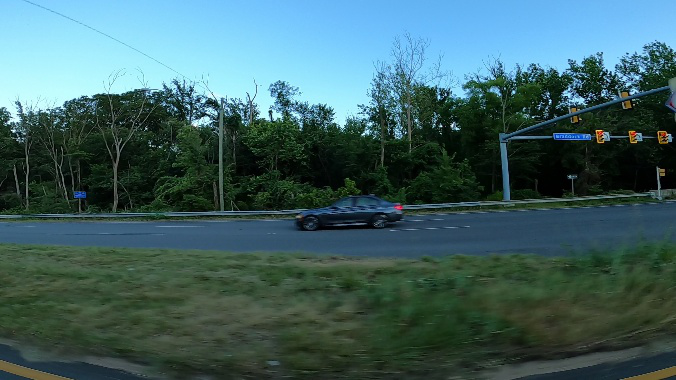

In [1]:
# Run but DO NOT MODIFY this code

# load car images and visualize a sample image
import os
from PIL import Image

# stores images in a dictionary keyed by image_id
path = 'car/car_images'
image_dict = {}
for file in os.listdir(path):
    if file.endswith('.jpg'):
        image_id = file.split('.')[0]
        image = Image.open(os.path.join(path, file))
        image_dict[image_id] = image

image_dict['vid_4_600']

Next, the following code reads the ground truth bounding box information for cars in all of the images. There may be multiple cars in a single image, in which case the dataset has multiple rows, one per car, just sharing the same image id. Images are identified with the same ids as above.

The code as written uses the [Pandas library](https://pandas.pydata.org/). If you prefer not to work with Pandas you are welcome to instead use the Python standard library [csv module](https://docs.python.org/3/library/csv.html) or NumPy to read the data into a structure of your preference.

In [2]:
# load car bounding boxes

import pandas as pd
bounding_boxes = pd.read_csv('car/car_bounding_boxes.csv')
bounding_boxes.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


## Task 1

Below we import a pretrained YOLO model. If you are unable to load the model due to a missing dependency (for example, the model needs access to the `cv2` module for computer vision) then you can try running the following command in a separate notebook cell by itself to attempt to install the dependencies: `pip install -U ultralytics`.

In [3]:
# load pre-trained Yolo model

import torch
import warnings
warnings.filterwarnings("ignore")
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/rajeshkumar/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-2 Python-3.12.2 torch-2.5.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Once you have loaded the model, use it on any image containing at least one car. Visualize the predicted bounding box on the image. You can see an [example of the basic model usage here](https://pytorch.org/hub/ultralytics_yolov5/#load-from-pytorch-hub); note that running the model returns a custom results object that can be visualized directly with `.show()`.

image 1/1: 380x676 1 car
Speed: 4.5ms pre-process, 52.2ms inference, 0.9ms NMS per image at shape (1, 3, 384, 640)


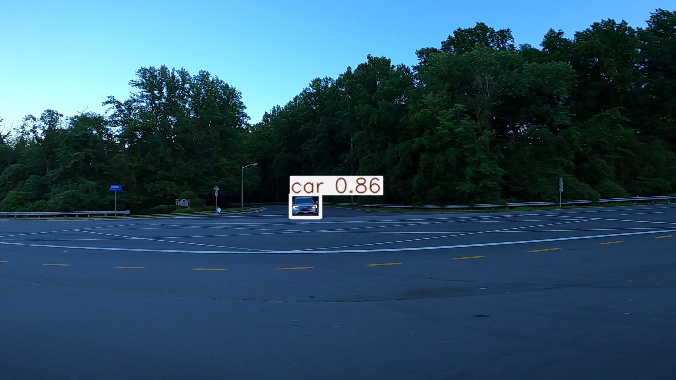

In [4]:
# write code for task 1 here
results = model(image_dict['vid_4_1000'])
results.print()
results.show()

## Task 2

The standard way to measure the correctness of a bounding box prediction in object detection is the intersection-over-union (IoU). Given a ground truth bounding box $B$ and a predicted bounding box $\hat{B}$, the IoU is the area of the *intersection* of $B$ and $\hat{B}$ (the number of pixels included in both) divided by the *union* of $B$ and $\hat{B}$ (the total number of pixels included in either). IoU should always be a value between 0 and 1, with larger scores indicating better bounding box predictions.

For this task, implement the `intersect_over_union` function below to calculate the IoU metric. You should then **test your implementation** before moving on, reporting at least 3 examples used for testing.

In [5]:
# write code for task 2 here 
import numpy as np

def intersect_over_union(ground_truth, pred):
    # input given as tuple of (x1, y1, x2, y2) where
    # (x1, y1) are the coordinates of the top left corner,
    # (x2, y2) are the coordinates of the bottom right corner.

    ground_truth = np.array(ground_truth)
    pred = np.array(pred)

    x_int_left = max(ground_truth[0], pred[0])
    x_int_right = min(ground_truth[2], pred[2])
    y_int_top = max(ground_truth[1], pred[1])
    y_int_bottom = min(ground_truth[3], pred[3])

    # Find area intersect
    width = max(0, x_int_right - x_int_left)
    height = max(0, y_int_bottom - y_int_top)
    area_intersect = width * height

    # Find union area
    ground_truth_area = (ground_truth[2] - ground_truth[0]) * (ground_truth[3] - ground_truth[1])
    pred_area = (pred[2] - pred[0]) * (pred[3] - pred[1])

    union_area = ground_truth_area + pred_area - area_intersect

    return area_intersect / union_area

In [6]:
# write code for task 2 here to test function
# report at least 3 examples used for testing

gt_1 = (1, 1, 4, 4) 
p_1 = (2, 2, 5, 5)
print(f"IoU for example 1: {intersect_over_union(gt_1, p_1):.4f}")

# Same as first one but both boxes are shifted left 1 and up 1, should have same area
gt_2 = (0, 0, 3, 3)
p_2 = (1, 1, 4, 4)
print(f"IoU for example 2: {intersect_over_union(gt_2, p_2):.4f}")

gt_3 = (0, 0, 5, 5)
p_3 = (1, 1, 6, 6)
print(f"IoU for example 3: {intersect_over_union(gt_3, p_3):.4f}")

# Shouldn't overlap at all
gt_4 = (1, 1, 3, 3)
p_4 = (4, 4, 5, 5)
print(f"IoU for example 4: {intersect_over_union(gt_4, p_4):.4f}")


IoU for example 1: 0.2857
IoU for example 2: 0.2857
IoU for example 3: 0.4706
IoU for example 4: 0.0000


## Task 3

Evaluate the YOLO model by computing and reporting the **recall** of the model's bounding box predictions for cars (and only cars) on the entire dataset. Recall that the recall is the fraction of cars that are correctly detected by the model. A couple things to note:

1. There may be multiple ground truth cars in a given image. When there are multiple cars in a given image, treat each one separately, so that the recall is over all appearances of cars in all images in the dataset.
2. Use the intersection over union metric to determine if a car is correctly detected. Specifically, consider a prediction to be a true positive if the IoU is at least $0.5.$

In [9]:
# Write code for task 3 here

predicted = 0
total = 0
for img in image_dict:
    res = model(image_dict[img])
    rows = bounding_boxes[bounding_boxes['image'] == img + str(".jpg")]
    rows = rows.reset_index(drop=True)
    if not rows.empty:
        for index, row in rows.iterrows():
            ground_truth = (row['xmin'], row['ymin'], row['xmax'], row['ymax'])
            for pred in res.xyxy[0]:
                pred_box = pred[:4]
                iou = intersect_over_union(ground_truth, pred_box)
                if iou >= 0.5:
                    predicted += 1
                    break
            total += 1

print(f"Recall: {predicted} / {total} = {predicted / total}")

Recall: 532 / 559 = 0.9516994633273703


## Task 4

You may have heard of **facial recognition** software: These are essentially models for object detection and recognition that are trained to detect and recognize human faces. Such models have been deployed in law enforcement and, for example, [US Customs when entering the country](https://www.cbp.gov/travel/biometrics).

Such adoption has happened despite serious ethical objections concerning bias and privacy. For example, [Gender Shades by Buolamwini and Gebru, 2018](https://proceedings.mlr.press/v81/buolamwini18a.html) was a landmark audit study of commercially available facial recognition software that demonstrated substantial disparities in performance based on skin color. 

In 2021, Marks observes in a [Communications of the ACM Article](https://cacm.acm.org/news/can-the-biases-in-facial-recognition-be-fixed-also-should-they/) cases of individuals wrongly accused of crimes on the basis of facial recognition software, including software developed using 2.8 billion scraped images from social media without user permission, raising further questions about privacy. 

Of course, others might argue that properly trained and debiased models might be used to build a safer (by helping to find criminal suspects) or more convenient society (replacing, for example, paper passports). Walsh, in a [2022 article](https://cacm.acm.org/opinion/the-troubling-future-for-facial-recognition-software/) considers a variety of perspectives including the threat of constant surveillance but also the potential for applications of societal benefit.

In 2-3 paragraphs, take a position on the question "Should governments use facial recognition software?" You might argue yes for some purposes but no for others, or that it depends on how the technology is developed or regulated; explain your view referencing any of the above articles or other sources of your own choosing.

*Write your response for task 4 here*

 Machine learning models for facial recognition should be used by the government to increase efficiency and eliminate biases inherent to humanity, but only if these models are provided more balanced training data and if the results of these models are checked in other ways. While these models definitely have their downfalls, they are objectively quite accurate in their determinations. According the linked US Customs page, the "CBP has processed more than 540 million travelers using biometric facial comparison technology and prevented more than 2,000 impostors from entry to the U.S." That itself shows the impact of the models, as 2,000 potentially dangerous individuals were prevented from causing any harm. It is also true, however, that many of these stops were incorrect. In my own experiences, I have seen my dad stopped countless times at airports because the scanner has deemed him an "imposter", whether that is because tens of thousands of people share his name, or because the scanner is simply wrong. These incorrect results certainly are bothersome to the people, as no one wants to be called an imposter, and they also slow down the security process. However, it is arguably okay for the scanner to be wrong once in a while if it successfully stops a significant number of true imposters. That is, the recall of these models is more important than their precision. To combat their relatively low precision, measures can be taken to double check the results of these models rather than accepting them at face value. For example, the people manning TSA can double check the results of the model to see if it is actually telling the truth.

Despite the benefits of facial recognition models, it is very important that these models be checked and given more balanced training data so that their classifications are fair and equitable. According to Gender Shades, darker-skinned females, who lie at the intersection of two minority groups, are misclassified with error rates up to 34.7%, while classification of lighter-skinned males is only as high as 0.8%. This poses a very clear issue, as individuals who are already face many systemic barriers in life are also being treated unjustly by the recognition models that are slowly taking over our society. If left unchecked, these models will perpetuate systemic inequities rather than enforcing the objective truth that they were hoped to bring.

 Ultimately, governments should utilize facial recognition software due to its ease of use via automation, but other measures should be taken to confirm results from machine learning models and train them with more equitable motivations, rather than taking those results at face value. Otherwise, these models could end up perpetuating system issues in our society rather than eliminating biases as we hope, and could lead to the misclassification of countless people.